In [8]:
#!/usr/bin/env python
import matplotlib.pyplot as plt
import numpy as np
import os


In [9]:

# List of directories to create
directories = [
    'img_ana/rmsf'
]

# Create directories (with parents if needed)
for dir_path in directories:
    os.makedirs(dir_path, exist_ok=True)
    print(f"Created directory: {dir_path}")

Created directory: img_ana/rmsf


In [10]:
# Constants 
# Modify the TM start and end residue according to your system
TM_REGIONS = [(16,43), (146,174), (176,196), (198,228), (234,258), (261,282),
              (341,368), (376,397), (404,423), (430,457), (463,491), (495,513)]
TM_BOUNDARIES = [16,43,146,174,176,196,198,228,234,258,261,282,
                 341,368,376,397,404,423,430,457,463,491,495,513]


In [11]:
# function to read gromacs output xvg file
def read_xvg(filename):
    """Read XVG file skipping comment lines"""
    return np.genfromtxt([i for i in open(filename).read().splitlines() 
                        if not i.startswith(('#','@'))])

In [12]:
# function to plot RMSF

def plot_data(file1, file2, file3, file4, file5, u_ylim, outfile, is_protein=True):
    """Plot RMSF data with formatting"""
    plt.figure(figsize=(10, 6))
    plt.rcParams.update({
        'font.weight': 'bold',
        'axes.labelweight': 'bold',
        'axes.labelsize': 10,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10
    })
    
    # Plot all replicates
    for data, color, label in zip([file1, file2, file3, file4, file5],
                                ['red', 'blue', 'green', 'black', 'cyan'],
                                ['rep1', 'rep2', 'rep3', 'rep4', 'rep5']):
        plt.plot(data[:, 0], data[:, 1], color=color, label=label)

    # Configure axes
    plt.xlabel('Residue index' if is_protein else 'Atom index', fontweight='bold')
    plt.ylabel('RMSF (nm)', fontweight='bold')
    plt.xticks(rotation=30)
    plt.ylim(0, u_ylim)

    # Add TM regions and vertical lines for protein
    if is_protein:
        for start, end in TM_REGIONS:
            plt.axvspan(start, end, color='gray', alpha=0.3)
        for boundary in TM_BOUNDARIES:
            plt.axvline(x=boundary, color='gray', linestyle='--')

    # Add titles and legend
    plt.title(f'RMSF of {"protein" if is_protein else "ligand"}', fontweight='bold')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.tight_layout()
    plt.savefig(f"img_ana/rmsf/{outfile}.png")
    plt.show()
    # plt.close()


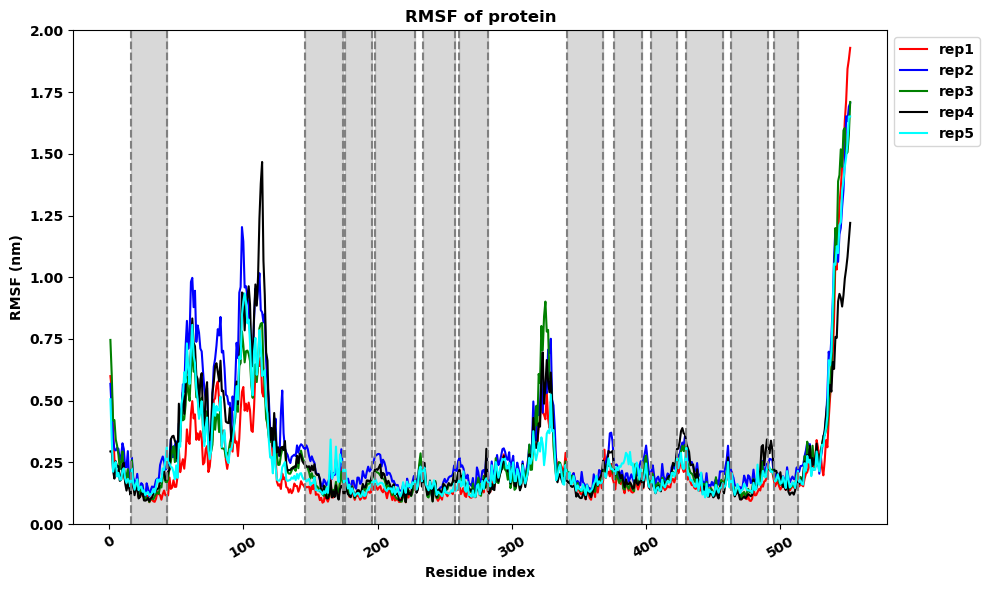

In [13]:
# Load and plot protein data
protein_files = [f'sim_ana/rmsf/oct2_BB_rmsf_rep{i}.xvg' for i in range(1, 6)]
protein_data = [read_xvg(f) for f in protein_files]
plot_data(*protein_data, 2, "protein_bb_rmsf", is_protein=True)



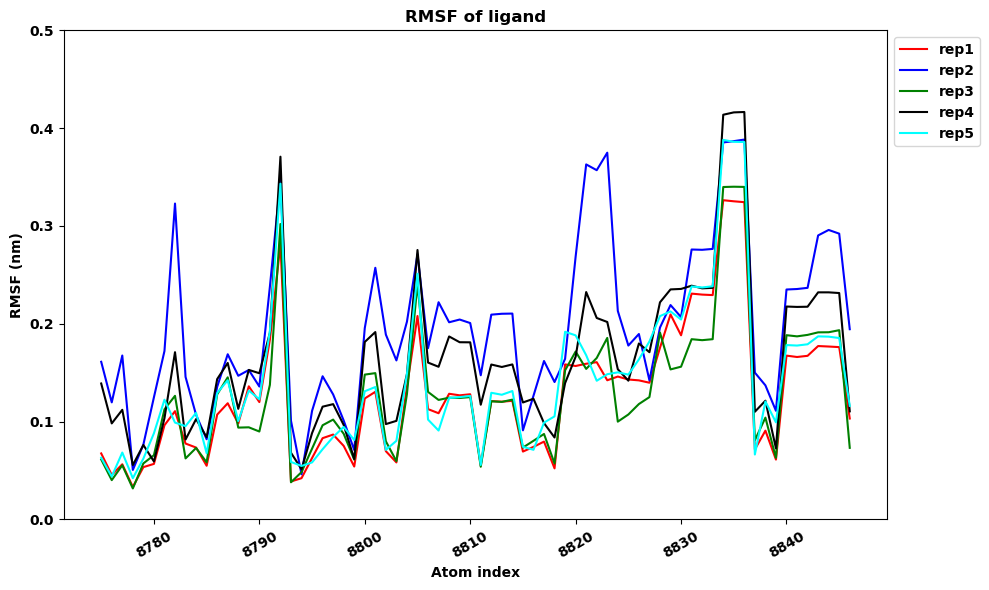

In [14]:
# Load and plot ligand data
ligand_files = [f'sim_ana/rmsf/ligand_rmsf_rep{i}.xvg' for i in range(1, 6)]
ligand_data = [read_xvg(f) for f in ligand_files]
plot_data(*ligand_data, 0.5, "ligand_rmsf_plot", is_protein=False)